# Anomaly Detection

## Import required libraries and the dataset, if not available pip install them


In [ ]:
# Import required libraries and the dataset, if not available pip install them
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import array
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedShuffleSplit
from sklearn import naive_bayes, metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, r2_score, precision_score, recall_score, f1_score, confusion_matrix, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)



# Data Visualization and Exploration

In [ ]:
def read_data_set():
    # Reading data_set
    return pd.read_csv("https://raw.githubusercontent.com/snakessilver/Anamoly_detection/main/Anamoly.csv")


In [ ]:
#read the data set from the provided cvs
df = read_data_set()



In [ ]:
# size of data set - rows and column count
print("======Shape(Rows, Columns) of Data Set ======", df.shape)


======Shape(Rows, Columns) of Data Set ====== (22544, 40)


In [ ]:
print("======First 2 records of Data Set ======")
df.head(2)

======First 2 records of Data Set ======


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10.0,0.04,0.06,0.0,0.0,0.0,0.0,1.0,1.0,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1.0,0.00,0.06,0.0,0.0,0.0,0.0,1.0,1.0,anomaly


In [ ]:
print("======Statistics of Data Set ======")
# statistics of data set
df.describe()
    

======Statistics of Data Set ======


,duration,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22531.000000,22532.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.105394,0.021647,0.442202,0.119899,0.002440,...,193.863965,140.752663,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.928428,0.150328,0.496659,7.269597,0.049334,...,94.042593,111.786948,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,101.000000,4.000000,1.000000,796.000000,1.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Target Output field "class" analysis: 

In [ ]:
df["class"].value_counts()

anomaly    12833
normal      9711
Name: class, dtype: int64

We see that there are 12833 anomaly records and 9711 normal records

In [ ]:
df["class"].value_counts() / len(df) * 100 

anomaly    56.924237
normal     43.075763
Name: class, dtype: float64

When we see in percentange prespective - Only 43 % records are normal and  rest 56 % records are of type anomaly . There is anomaly deducted in the data of given data set and hence has class imbalance.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


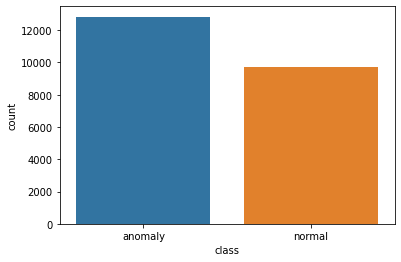

In [ ]:
sns.countplot(df['class'])


As seen from the plot graph amount of anomaly records are more then normal records leading to imbalance of class. 

# Co-Relation Analysis

Strongly corelated fields - Strongly corelated fields if value of one increase 
other also increases and vice versa.
We can ignore one of the field as it will save time in processing and also duplication of data
Heatmap based is used to generate the correlation mapping between fields

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5]), <a list of 36 Text major ticklabel objects>)

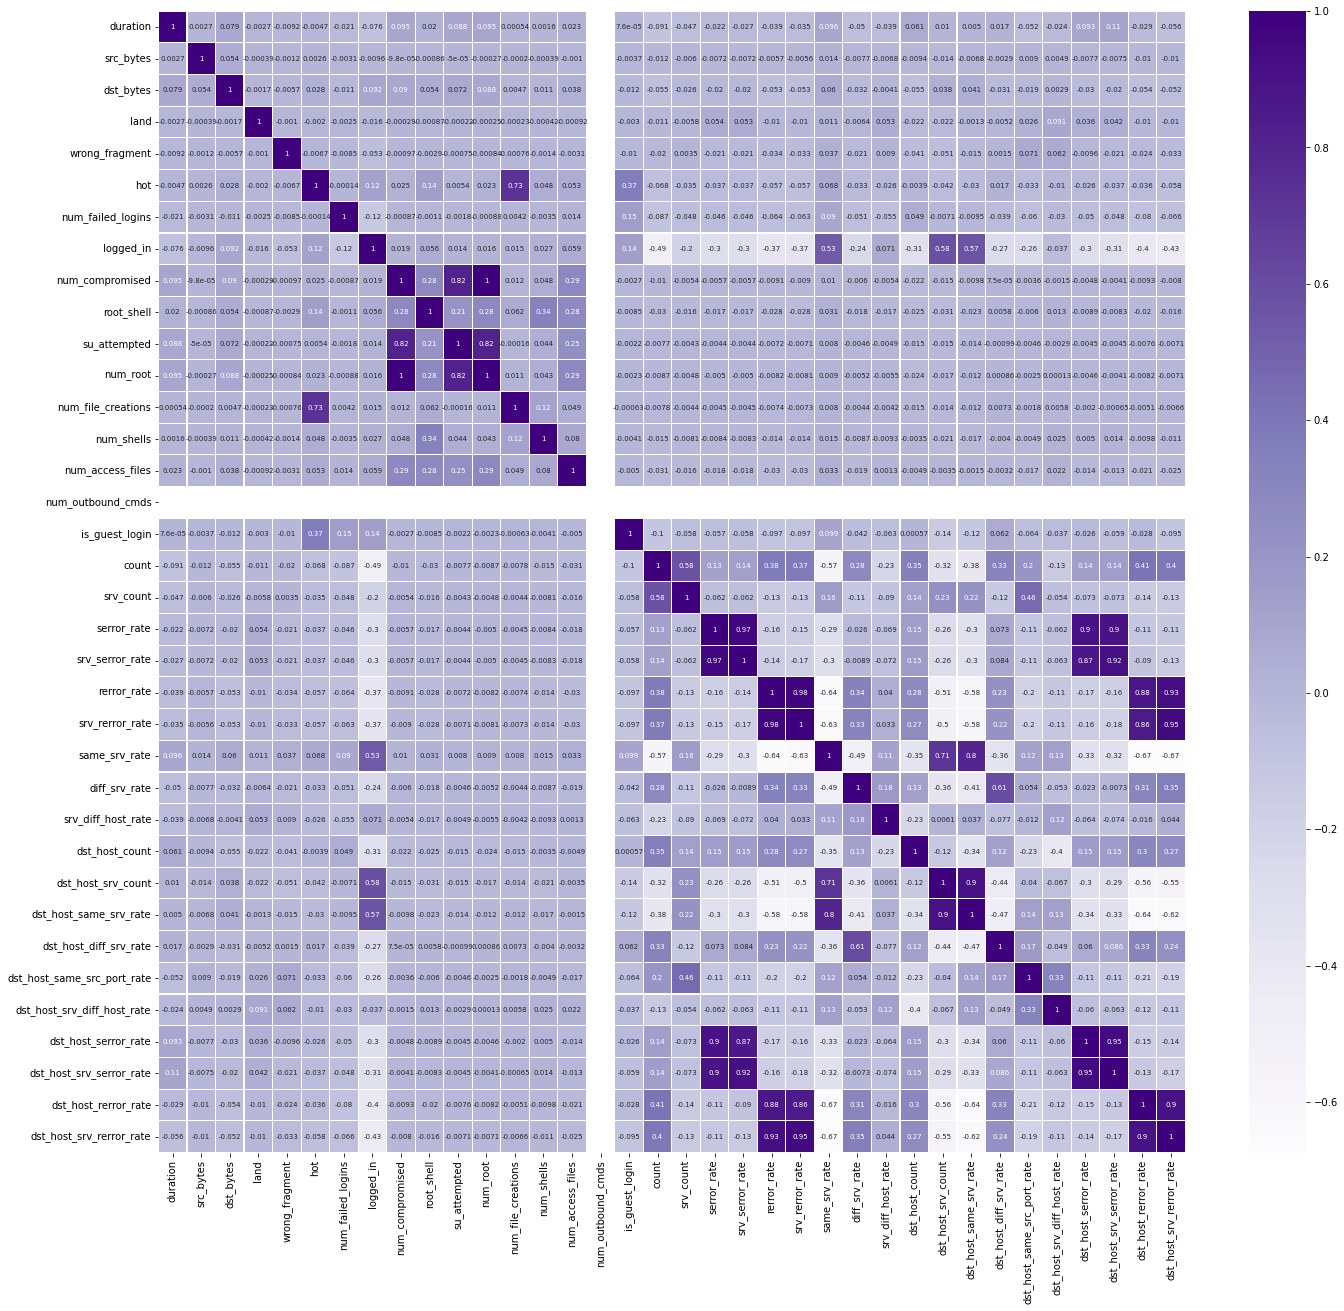

In [ ]:
# Using Heat map for generating the corelation map
plt.figure(figsize=(23, 21))
sns.heatmap(df.corr(), linewidths=.1, cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0)

Conclusion As per heatmap :- 

A) num_outbound_cmds - Column does not have any only one value i,e 0 , hence can be dropped .

b) We can see that there are strong positive corelation between some of the field ,
hence we can remove them and consider using either of one value. Because when value of one increase other goes in same direction.

1) num_compromised, num_root - Very Strong Positive Corelation.

2) num_compromised, su_attempted
   and su_attempted, num_root - Strong Positive Corelation but not above 0.9 threshold 
   
3) serror_rate, srv_serror_rate - Very Strong Positive Corelation.

4) rerror_rate, srv_rerror_rate 
   and rerror_rate, dst_host_srv_rerror_rate - Very Strong Positive Corelation.

5) dst_host_serror_rate, dst_host_srv_serror_rate - Very Strong Positive Corelation.

6) dst_host_rerror_rate, dst_host_srv_rerror_rate - Very Strong Positive Corelation.

7) serror_rate, dst_host_serror_rate - Very Strong Positive Corelation.

8) serror_rate, dst_host_srv_serror_rate 
   and srv_serror_rate, dst_host_srv_rerror_rate - Very Strong Positive Corelation.

9) srv_serror_rate, dst_host_serror_rate - Strong Positive Corelation but not above 0.9 threshold

10) rerror_rate, dst_host_rerror_rate 
    and srv_serror_rate, dst_host_rerror_rate - Strong Positive Corelation but not above 0.9 threshold


In [ ]:
# Heatmap shows that num_outbound_cmds has only one value i,e 0. Hence dropping off.
df.drop(['num_outbound_cmds'], axis=1, inplace=True)


In [ ]:
# Heatmap shows highly positive corelated values,
# so we can consider one of them instead of both.
df.drop(['num_root'], axis=1, inplace=True)
df.drop(['srv_serror_rate'], axis=1, inplace=True)
df.drop(['srv_rerror_rate'], axis=1, inplace=True)
df.drop(['dst_host_srv_serror_rate'], axis=1, inplace=True)
df.drop(['dst_host_srv_rerror_rate'], axis=1, inplace=True)
df.drop(['dst_host_serror_rate'], axis=1, inplace=True)


In [ ]:
# size of data set - rows and column count
print("======Shape(Rows, Columns) of Data Set ======", df.shape)

======Shape(Rows, Columns) of Data Set ====== (22544, 33)


# Data Type Analysis - Categorical data etc


In this data set we have protocol_type,service, flag,class columns  which are categorical data.
We must convert categorical data to Numeric values 
so that classifier algo's during train work with them as they require data to be in numeric form   

In [ ]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,255.0,10.0,0.04,0.06,0.00,0.00,1.00,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,255.0,1.0,0.00,0.06,0.00,0.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.00,0.00,134.0,86.0,0.61,0.04,0.61,0.02,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,0.00,1.00,3.0,57.0,1.00,0.00,1.00,0.28,0.00,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.00,0.75,29.0,86.0,0.31,0.17,0.03,0.02,0.83,anomaly


In [ ]:
# Using LabelEncoder to convert the categorical data into numerical data 
cols = ['protocol_type', 'service', 'flag', 'class']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)


In [ ]:
df.head(5)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,class
0,0,1,45,1,0,0,0,0,0,0,...,0.06,0.00,255.0,10.0,0.04,0.06,0.00,0.00,1.00,0
1,0,1,45,1,0,0,0,0,0,0,...,0.06,0.00,255.0,1.0,0.00,0.06,0.00,0.00,1.00,0
2,2,1,19,9,12983,0,0,0,0,0,...,0.00,0.00,134.0,86.0,0.61,0.04,0.61,0.02,0.00,1
3,0,0,13,9,20,0,0,0,0,0,...,0.00,1.00,3.0,57.0,1.00,0.00,1.00,0.28,0.00,0
4,1,1,55,2,0,15,0,0,0,0,...,0.00,0.75,29.0,86.0,0.31,0.17,0.03,0.02,0.83,0


# Pre Processing and cleaning

Checking for Null or NA data . If there are large number of values  like in thousands then remove column 
or if only few rows are with na then drop those values.



In [ ]:
df.isna().sum()

duration                        0
protocol_type                   0
service                         0
flag                            0
src_bytes                       0
dst_bytes                       0
land                            0
wrong_fragment                  0
hot                             0
num_failed_logins               0
logged_in                       0
num_compromised                 0
root_shell                      0
su_attempted                    0
num_file_creations              0
num_shells                      0
num_access_files                0
is_guest_login                  0
count                           0
srv_count                       0
serror_rate                     0
rerror_rate                     0
same_srv_rate                   0
diff_srv_rate                   0
srv_diff_host_rate              0
dst_host_count                 13
dst_host_srv_count             12
dst_host_same_srv_rate          0
dst_host_diff_srv_rate          0
dst_host_same_

It can be seen from output above that dst_host_count has 13 and dst_host_srv_count = 12 values . Hence removing those values

In [ ]:
df=df.dropna()

In [ ]:
# Verify if there are dropped.
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_file_creations             0
num_shells                     0
num_access_files               0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
rerror_rate                    0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_same_srv_rate         0
dst_host_diff_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_s

# Outlier Analysis 

In [ ]:
def show_outliers(df):
    # boxplot will show the outliers in Q1 , Q3 , IQR and outliers
    plt.figure(figsize=(40,25))
    sns.boxplot(data=df, width=0.22)


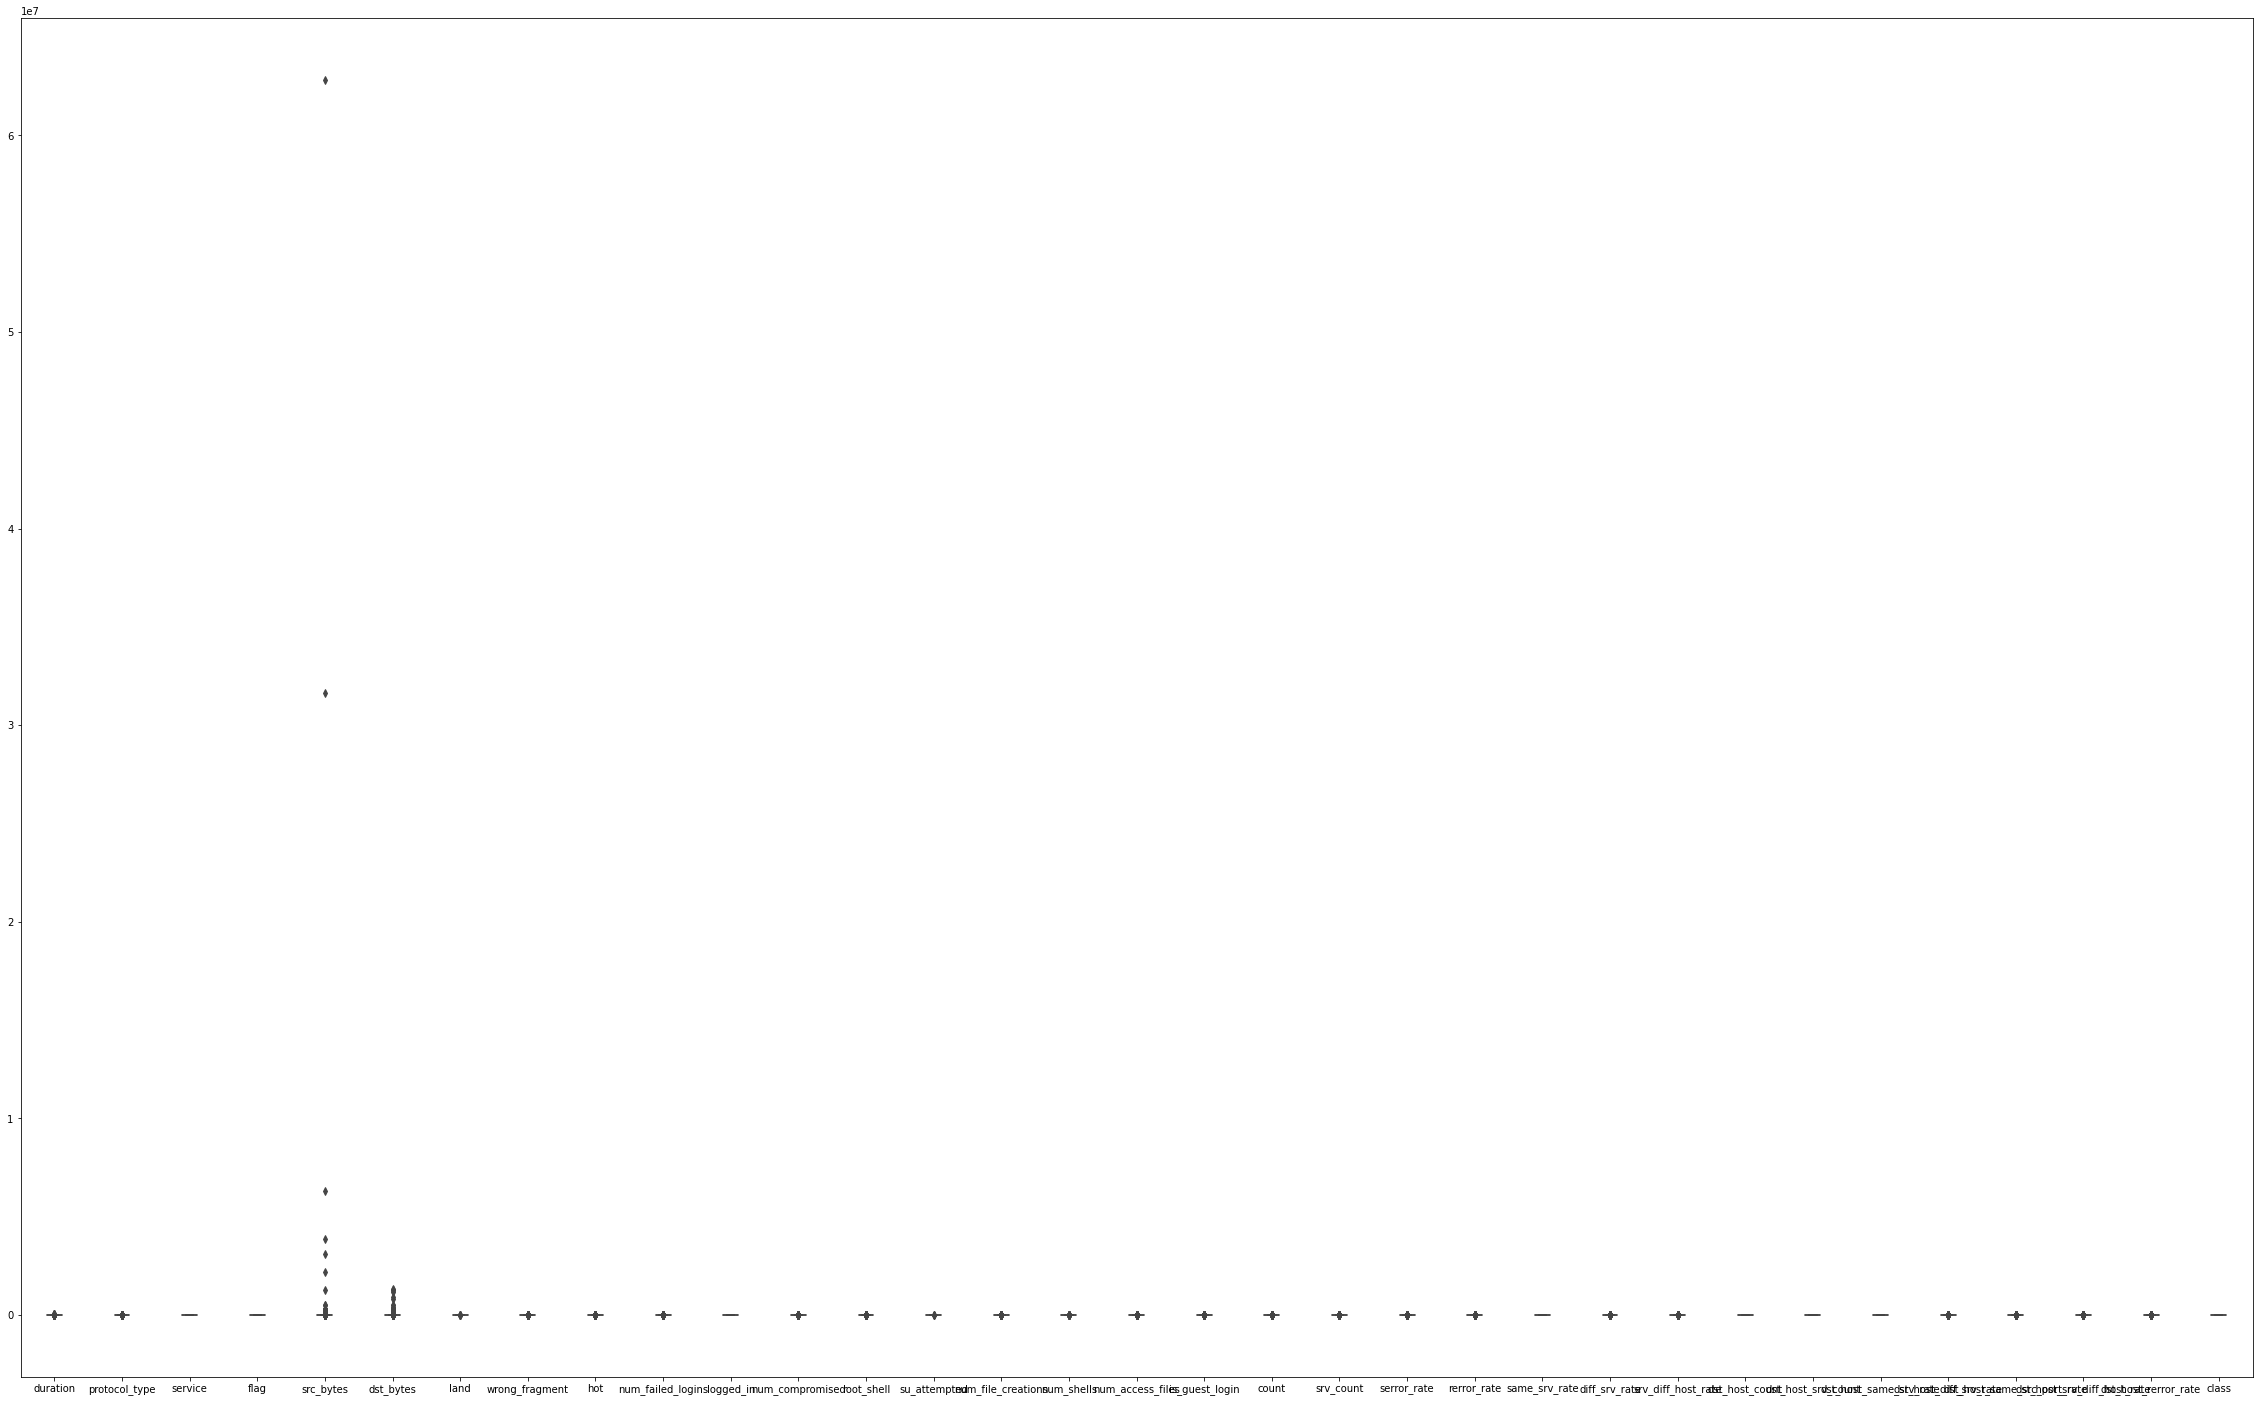

In [ ]:
# show the outliers and then decide and remove them
show_outliers(df)

# Double click to zoom in if needed

We can see that src_bytes column has multiple outliers and this column can be further shown using box plot 

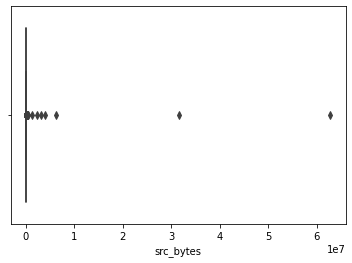

In [ ]:
# As above seen src_bytes has outliers hence , lets see closer look at src_bytes column
sns.boxplot(x=df['src_bytes'])


Identify those outlier and remove them

In [ ]:
# Identify those outlier and remove them
def identify_outliers(data, featureName):
    mean = np.mean(data[featureName])
    stddev = np.std(data[featureName])
    indices = []
    for index, value in data[featureName].iteritems():
        z_score = (value - mean) / stddev
        if abs(z_score) > 3:
            indices.append(index)
    return indices


In [ ]:
src_bytes_outliers = identify_outliers(df, 'src_bytes')
df.drop(src_bytes_outliers, inplace=True)
print(src_bytes_outliers)
print('Total outliers removed are {}'.format(len(src_bytes_outliers)))

[1993, 5531, 19055, 19309, 21810, 22454]
Total outliers removed are 6


# Normalization

Normalization of the data scales each input variable separately to the range 0-1, which is the range for floating-point values where we have the most precision.

Also another Reason for Normalisation was when we ran the models with and without normalisation of data there was 4 - 5 % changes in accuracy , prediction values of models . Models where performing better after Normalization of data .

In [ ]:
# For Better Precision before normalising the data we will convert the data into float

df = df.astype(float)

# As per analysis , these are the columns which are not in scale of 0-1 and are in different scale.
# Hence need to normalise the column values so that we achieve better predict score with most precision.
cols = [
    "duration","protocol_type", "service", "flag", "src_bytes",
    "dst_bytes","wrong_fragment","hot","num_failed_logins",
    "num_compromised","su_attempted",
    "num_file_creations","num_shells","num_access_files","count","srv_count",
    "dst_host_count","dst_host_srv_count"
]

scaler = MinMaxScaler()
# transform data
df[cols] = scaler.fit_transform(df[cols])



In [ ]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,class
0,0.000000,0.5,0.714286,0.1,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.06,0.00,1.000000,0.039216,0.04,0.06,0.00,0.00,1.00,0.0
1,0.000000,0.5,0.714286,0.1,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.06,0.00,1.000000,0.003922,0.00,0.06,0.00,0.00,1.00,0.0
2,0.000035,0.5,0.301587,0.9,0.010281,0.000000,0.0,0.0,0.0,0.0,...,0.00,0.00,0.525490,0.337255,0.61,0.04,0.61,0.02,0.00,1.0
3,0.000000,0.0,0.206349,0.9,0.000016,0.000000,0.0,0.0,0.0,0.0,...,0.00,1.00,0.011765,0.223529,1.00,0.00,1.00,0.28,0.00,0.0
4,0.000017,0.5,0.873016,0.2,0.000000,0.000011,0.0,0.0,0.0,0.0,...,0.00,0.75,0.113725,0.337255,0.31,0.17,0.03,0.02,0.83,0.0


Now the values of Cols are in the range of 0-1 and are normalised throughout 



#Model Building,Training Model , Prediction , Regularization


Getting the X and y axis data for test data preparation

In [ ]:
y = df['class']
X = df.drop(['class'],axis=1)
X = np.array(X)


Case 1 : Train = 80 % Test = 20% [ x_train1,y_train1] = 80% ; [ x_test1,y_test1] = 20% ;

Normal Way(using train_test_split) to split the data set into training and test is as below

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.20, random_state = 1)

Case 2 : Train = 10 % Test = 90% [ x_train2,y_train2] = 10% ; [ x_test2,y_test2] = 90%

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.90, random_state = 1)

This train_test_split method will return a tuple with two DataFrames containing the training and testing data set.

## Training Model, Prediction, Regularization, Overfitting, Print Eval Params

In [ ]:

#Columns for regularization matrix
r_metrics_cols = ['Fold_No', 'Model', 'Alpha', 'Accuracy', 'R2', 'MAE', 'MSE', 'RMSE']
alpha_range = array([0, 1.e-02, 1.e-01])
r_metrics_train = pd.DataFrame(columns=r_metrics_cols)
r_metrics_test = pd.DataFrame(columns=r_metrics_cols)
classifier_data={}


# This method will predict the accuracy of model using the train and test data passed
# Models used are : 
# 1) GaussianNB
# 2) BernoulliNB
# 3) MultinomialNB


def train_model(model_type, X, y, train_index, test_index):
    global r_metrics_train
    global r_metrics_test
    global classifier_data
    global alpha_range

    # Prepare Train and Test data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #Running models with different smoothing parameters
    #The smoothing parameter ensures that the probability value is never zero.
    #Applying a smoothing technique assigns a very small probability estimate to such zero frequency occurrences, hence, regularize the Naive Bayes classifier.
    for alpha in alpha_range:
        # Initialise the Model object
        if (model_type == 'GaussianNB'):
            classifier = GaussianNB() if alpha==0 else GaussianNB(var_smoothing=alpha)
        elif (model_type == 'BernoulliNB'):
            classifier = BernoulliNB(alpha=alpha, binarize=0.0)
        elif (model_type == 'MultinomialNB'):
            classifier = MultinomialNB(alpha=alpha)

        # Train Model Classifer
        classifier.fit(X_train,y_train)
        # Y_train : Predict the response for train dataset and Finding the accuracy score of the model
        y_train_predictions = classifier.predict(X_train)
        y_train_accuracy = round(accuracy_score(y_train, y_train_predictions), 5)
        
        # Y_test : Predict the response for test dataset and Finding the accuracy score of the model
        y_test_predictions = classifier.predict(X_test)
        y_test_accuracy = round(accuracy_score(y_test, y_test_predictions), 5)

        # Finding r_metrics_train : Using the regularization metrics with the model predicted scores calculating the r_metrics values [R2, MAE, MSE, RMSE]
        r_metrics_train = r_metrics_train.append({'Fold_No':fold_no, 'Model':model_type, 'Alpha':alpha,'Accuracy':y_train_accuracy},ignore_index=True)
        r_metrics_train = regularization_metrics(y_train, y_train_predictions, r_metrics_train)
        
        # Finding r_metrics_test : using the regularization metrics with the model predicted scores calculating the r_metrics values [R2, MAE, MSE, RMSE]
        r_metrics_test = r_metrics_test.append({'Fold_No':fold_no, 'Model':model_type, 'Alpha':alpha,'Accuracy':y_test_accuracy},ignore_index=True)
        r_metrics_test = regularization_metrics(y_test, y_test_predictions, r_metrics_test)
        
        # Reason for finding both y_train and y_test values are because we want to know if it is underfitting/overfitting/just right model.

        #Storing the result of classfier with alpha which produces best accuracy 
        #Taking the highest accuracy model for Each Model Type
        if(model_type in classifier_data):
            if(classifier_data.get(model_type)['accuracy'] < y_test_accuracy ):
                classifier_data.update({model_type: {'classifier':classifier, 'accuracy':y_test_accuracy, 'y_test':y_test, 'predictions':y_test_predictions}})
        else:
            classifier_data.__setitem__(model_type, {'classifier':classifier, 'accuracy':y_test_accuracy, 'y_test':y_test, 'predictions':y_test_predictions})

# Method to calculate regularize metrics for the predict score of a given model 
def regularization_metrics(y_test, predictions, r_metrics):
    """
    Regularization Metrics

    we should see an increase in R-Square Value as we applied regularization.
    we should see a decrease in other metrics MAE, MSE and RMSE with different values
    """

    # calculate R^2 value, MAE, MSE, RMSE

    
    r_metrics.loc[r_metrics.index[-1], 'R2'] = r2_score(y_test,predictions)
    r_metrics.loc[r_metrics.index[-1], 'MAE'] = metrics.mean_absolute_error(y_test, predictions)
    r_metrics.loc[r_metrics.index[-1], 'MSE'] = metrics.mean_squared_error(y_test, predictions)
    r_metrics.loc[r_metrics.index[-1], 'RMSE'] = np.sqrt(metrics.mean_squared_error(y_test, predictions))

    return r_metrics


def extract_evaluation_parameters(y_test, predictions):
    """
    using following evaluation metrics
    Accuracy
    Precision
    Recall
    F1 Score
    Confusion Matrix

    to be computed from test data and predictions
    :param y_test:
    :param predictions:
    :return:
    """
    eval={}
    eval.__setitem__('accuracy', accuracy_score(y_test, predictions))
    eval.__setitem__('precision', precision_score(y_test, predictions))
    eval.__setitem__('recall', recall_score(y_test, predictions))
    eval.__setitem__('f1_score', f1_score(y_test, predictions))
    eval.__setitem__('confusion_matrix', confusion_matrix(y_test, predictions))
    df_eval=pd.DataFrame.from_dict(eval, orient='index')
    print(df_eval)


def print_model_evaluation_results():
    # run evaluation metrics for each classification.
    # Among the various run of classifications, we have kept the one which produced best accuracy. This selection criteria can be changed.
    for classifier in classifier_data:
        val = classifier_data.get(classifier)
        print("\n")
        print("Best Accuracy Result in each model : ", classifier)
        extract_evaluation_parameters(val['y_test'], val['predictions'])

# Normal KFold

Normal KFold way of splitting the dataset is as below :
Mention the n_splits i,e how many splits are needed


But Kfold in its split method **does not accept the parameter of test_size** like 20 % etc hence to overcome this
we can use StratifiedShuffleSplit which will accept the test_size along with n_splits.

In [ ]:
fold_size = 2
kf = KFold(n_splits=fold_size)
test_models = ['GaussianNB','BernoulliNB', 'MultinomialNB']
fold_no = 1
# split()  method generate indices to split data into training and test set.
print('Normal KFold without Train Size')
for train_index, test_index in kf.split(X, y):
  print('Fold Number: ', str(fold_no))
  for model_type in test_models:
    train_model(model_type, X, y , train_index, test_index)
  fold_no = fold_no + 1 
  print('\n')
   

Normal KFold without Train Size
Fold Number:  1


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN




Fold Number:  2


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


In [ ]:
r_metrics_train[r_metrics_train['Model']=='GaussianNB']

,Fold_No,Model,Alpha,Accuracy,R2,MAE,MSE,RMSE
0,1,GaussianNB,0.00,0.83884,0.343103,0.161161,0.161161,0.401449
1,1,GaussianNB,0.01,0.82161,0.272889,0.178387,0.178387,0.422359
2,1,GaussianNB,0.10,0.80794,0.217153,0.192062,0.192062,0.438249
9,2,GaussianNB,0.00,0.84115,0.351798,0.158853,0.158853,0.398563
10,2,GaussianNB,0.01,0.81566,0.247811,0.184337,0.184337,0.429345
11,2,GaussianNB,0.10,0.79977,0.182954,0.200231,0.200231,0.447472


In [ ]:
print_model_evaluation_results()



Best Accuracy Result in each model :  GaussianNB
                                            0
accuracy                             0.848251
precision                            0.760191
recall                               0.947347
f1_score                             0.843512
confusion_matrix  [[4947, 1453], [256, 4606]]


Best Accuracy Result in each model :  BernoulliNB
                                           0
accuracy                            0.903126
precision                           0.872886
recall                              0.906612
f1_score                            0.889429
confusion_matrix  [[5783, 639], [452, 4388]]


Best Accuracy Result in each model :  MultinomialNB
                                            0
accuracy                             0.831113
precision                            0.737179
recall                               0.946113
f1_score                              0.82868
confusion_matrix  [[4760, 1640], [262, 4600]]


# Conclusion : Based on Results we can conclude and consider the BernoulliNB Model . The reasons are accuracy , Precision are relatively higher compared to other models.

# Underfitting/Overfitting/Just right model

In [ ]:
# Plot the graph to check if the result is underfitting/overfitting/just right model.

total_folds_and_alpha = []
fold_size = kf.get_n_splits()
alpha_size = len(alpha_range)
for i in range(1,(fold_size * alpha_size)+1):
    total_folds_and_alpha.append(i)


def plot_mea_graph(model_type):
  model_r_metrics_train = r_metrics_train[r_metrics_train['Model'] == model_type]
  model_r_metrics_test = r_metrics_test[r_metrics_test['Model'] == model_type]


  plt.plot(total_folds_and_alpha, model_r_metrics_train['MAE'].to_numpy(), 'o-', color='green', label='train')
  plt.plot(total_folds_and_alpha, model_r_metrics_test['MAE'].to_numpy(), 'o-', color='red', label='test')
  plt.xlabel(f'Number of folds_size({fold_size}) *  Number of aplha Values({alpha_size})')
  plt.ylabel('Mean Absolute Error')
  plt.show()

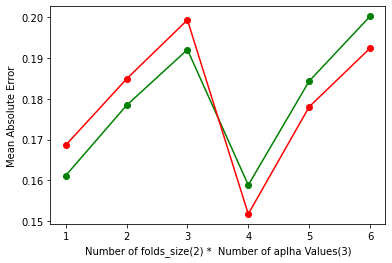

In [ ]:
plot_mea_graph('GaussianNB')

Gaussian : Error on train and test data are in similar lines and went sharply low at 4th fold. After that it increased - where error on test data was slightly more than train data.
But in all, error on both test and train data were in same range and thus qualify  to underfitting model. 

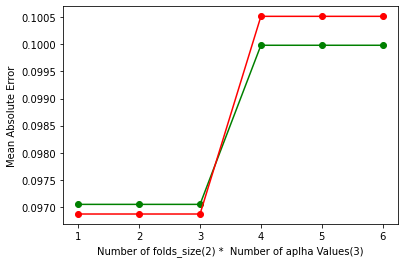

In [ ]:
plot_mea_graph('BernoulliNB')


Bernolli : The model error for both test and train data was very low initially. It rose after three fold but still remains in reasonable limits.
By virtue of this, we can say that this model was just fitting - where both test and train data have low and acceptable error


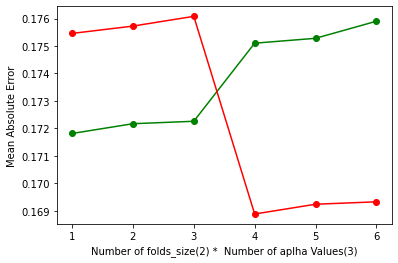

In [ ]:
plot_mea_graph('MultinomialNB')


Multinomial : Initially the error on model’s train data was higher and was lower on test data - which is a good sign for a good model.
But after 3 folds, the error on train data sharply decreased while error on test data sharply increased - leading the model to a over fitting state

In [ ]:
# Resetting Classifier Data - We want to run it with split hence we use StratifiedShuffleSplit where we will pass fold_numbers , split_size.
r_metrics_train = pd.DataFrame(columns=r_metrics_cols)
r_metrics_test = pd.DataFrame(columns=r_metrics_cols)
classifier_data={}

# StratifiedShuffleSplit KFold

Reason to use this : It takes both fold_size and test_size .

In [ ]:
# KFold Size = 2 i,e 
fold_size = 2
test_models = ['GaussianNB','BernoulliNB', 'MultinomialNB']


# Run test for Each Test size 
# Scenario 1 ) Split into 2 folds with Test data = 20 % and Training Data = 80%
# Scenario 2 ) Split into 2 folds with Test data = 90 % and Training Data = 10%
# Used StratifiedShuffleSplit because normal Kfold does not allow test_size to be mentioned while splitting
print('StratifiedShuffleSplit KFold With Train Size')
for test_size in [0.2, 0.90]:
    sss = StratifiedShuffleSplit(n_splits=fold_size, test_size=test_size, random_state=1)
    fold_no = 1
    print('Scenario: Test Data Size : ', str((test_size)*100), '%' , 'Train Data Size: ', str(round((1-test_size)*100)), '%')
    # Each Model what is result for same train data and test data
    for train_index, test_index in sss.split(X, y):
        print('Fold Number: ', str(fold_no))
        for model_type in test_models:
            train_model(model_type, X, y , train_index, test_index)
        fold_no = fold_no + 1 
        print('\n')
       

StratifiedShuffleSplit KFold With Train Size
Scenario: Test Data Size :  20.0 % Train Data Size:  80 %
Fold Number:  1


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN




Fold Number:  2


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN




Scenario: Test Data Size :  90.0 % Train Data Size:  10 %
Fold Number:  1


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN




Fold Number:  2




/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


In [ ]:
print_model_evaluation_results()




Best Accuracy Result in each model :  GaussianNB
                                            0
accuracy                             0.863605
precision                            0.786572
recall                               0.937815
f1_score                             0.855561
confusion_matrix  [[9318, 2222], [543, 8189]]


Best Accuracy Result in each model :  BernoulliNB
                                           0
accuracy                            0.899445
precision                           0.875695
recall                              0.893299
f1_score                            0.884409
confusion_matrix  [[2319, 246], [207, 1733]]


Best Accuracy Result in each model :  MultinomialNB
                                            0
accuracy                             0.839335
precision                            0.750114
recall                                0.94022
f1_score                             0.834477
confusion_matrix  [[8805, 2735], [522, 8210]]


# Conclusion : Based on Results we can conclude and consider the **BernoulliNB** **Model** . The reasons are accuracy , Precision are relatively higher compared to other models and confusion_matrix is lower.